# QUESTION 1



In [4]:
#Step 1. Import the necessary libraries

import pandas as pd

## Step 2: Import the dataset from the given address.
# Step 3: Assign it to a variable called users.

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
#Step 4. Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [7]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

# Filtering the dataset to include only male users.
male_users = users[users['gender'] == 'M']

# Grouping the male users by occupation and counting how many males are in each occupation.
male_count_per_occupation = male_users.groupby('occupation').size()

# Grouping the entire dataset by occupation to get the total number of users in each occupation.
total_count_per_occupation = users.groupby('occupation').size()

# Calculating the male ratio per occupation by dividing the number of males by the total number of users in each occupation.
male_ratio_per_occupation = male_count_per_occupation / total_count_per_occupation

# Sorting the male ratio from the highest to the lowest.
male_ratio_sorted = male_ratio_per_occupation.sort_values(ascending=False)

# Print the sorted male ratio per occupation.
print(male_ratio_sorted)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [5]:
#Step 6. For each occupation, calculate the minimum and maximum ages

min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [8]:
#Step 7. For each combination of occupation and sex, calculate the mean age

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_sex)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
#Step 8. For each occupation present the percentage of women and men

# Grouping the data by occupation and gender, then counting the number of occurrences.
gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

# Calculating the percentage of each gender within each occupation.
gender_percentage_per_occupation = gender_count_per_occupation.div(gender_count_per_occupation.sum(axis=1), axis=0) * 100

# Printing the resulting percentages.
print(gender_percentage_per_occupation)


gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# QUESTION 2

In [11]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
import pandas as pd

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

#Step 4. Select only the Goal column
goals = euro12['Goals']
print(goals)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [14]:
#Step 5. How many team participated in the Euro2012?

num_teams = euro12['Team'].nunique()
print(f"Number of teams that participated in the Euro2012 is: {num_teams}")


Number of teams that participated in the Euro2012 is: 16


In [15]:
#Step 6. What is the number of columns in the dataset?

num_columns = euro12.shape[1]
print(f"Number of columns in the dataset: {num_columns}")


Number of columns in the dataset: 35


In [16]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [19]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards

sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print(sorted_teams)


                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [22]:
#Step 9. Calculate the mean Yellow Cards given per Team

discipline[['Team','Yellow Cards']].groupby('Team').mean()


,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [25]:
#Step 10. Filter teams that scored more than 6 goals

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
teams_more_than_6_goals


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [29]:
#Step 11. Select the teams that start with G

euro12[euro12["Team"].str.startswith("G")]["Team"]

5    Germany
6     Greece
Name: Team, dtype: object

In [30]:
#Step 12. Select the first 7 columns

euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [31]:
#Step 13. Select all columns except the last 3

euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [32]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# QUESTION 3

In [33]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

#Step 2. Create 3 differents Series, each of length 100, as follows:

# First series: random numbers from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, size=100))

# Second series: random numbers from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, size=100))

# Third series: random numbers from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

#Step 3. Create a DataFrame by joinning the Series by column
df = pd.concat([series1, series2, series3], axis=1)
df

,0,1,2
0,3,3,15105
1,3,1,13687
2,2,3,11329
3,1,3,29379
4,2,3,14833
...,...,...,...
95,4,3,13903
96,1,3,19369
97,2,3,22278
98,4,2,15056


In [34]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(df.head())  # To check the first few rows of the DataFrame

   bedrs  bathrs  price_sqr_meter
0      3       3            15105
1      3       1            13687
2      2       3            11329
3      1       3            29379
4      2       3            14833


In [35]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print(bigcolumn)


     bigcolumn
0            3
1            3
2            2
3            1
4            2
..         ...
295      13903
296      19369
297      22278
298      15056
299      29129

[300 rows x 1 columns]


In [36]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn.index[-1]==99

False

In [37]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn.index)  # This confirms that the index is now from 0 to 299.



RangeIndex(start=0, stop=300, step=1)


# QUESTION 4

In [49]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from the attached file wind.txt
import pandas as pd
import numpy as np


# Load the dataset
data = pd.read_csv('wind.txt', delim_whitespace=True)

#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

# Combine the first three columns into a single datetime column with a specific format
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Drop the original Yr, Mo, Dy columns
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

# Set the new 'date' column as the index
data = data.set_index('date')

print(data.head())  # Display the first few rows to verify


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
date                                                                       
2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
date                             
2061-01-01  12.58  18.50  15.04  
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  


In [47]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_year(x):
    year = x.year - 100 if x.year > 2000 else x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)

print(data.head())  # Verify the correction


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


In [57]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

import pandas as pd

# Load the dataset
data = pd.read_csv('wind.txt', delim_whitespace=True)

import pandas as pd

# Load the dataset
data = pd.read_csv('wind.txt', delim_whitespace=True)

# Combine 'Yr', 'Mo', 'Dy' into 'Yr_Mo_Dy'
data["Yr_Mo_Dy"] = data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1)

# Convert 'Yr_Mo_Dy' to datetime format (handle two-digit years)
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"], format='%y-%m-%d')

# Set 'Yr_Mo_Dy' as the index
data.set_index("Yr_Mo_Dy", inplace=True)

print(data.head())  




            Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA  \
Yr_Mo_Dy                                                                        
2061-01-01  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25   
2061-01-02  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   
2061-01-03  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   
2061-01-04  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   
2061-01-05  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54   

              MUL    CLO    BEL    MAL  
Yr_Mo_Dy                                
2061-01-01  10.83  12.58  18.50  15.04  
2061-01-02   9.79   9.67  17.54  13.83  
2061-01-03   8.50   7.67  12.75  12.71  
2061-01-04   5.83   5.88   5.46  10.88  
2061-01-05  10.92  10.34  12.92  11.83  


In [58]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missing_values = data.isnull().sum()
print(missing_values)



Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [59]:
#Step 7. Compute how many non-missing values there are in total.
non_missing_values = data.notnull().sum().sum()
print(non_missing_values)


98579


In [63]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
# Calculate the mean windspeeds for each location over all the times
mean_windspeed_per_location = data.mean()
print(mean_windspeed_per_location)


Yr     69.500304
Mo      6.523274
Dy     15.728628
RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64


In [67]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
loc_stats


,min,max,mean,std
Yr,61.00,78.00,69.500304,5.188131
Mo,1.00,12.00,6.523274,3.448871
Dy,1.00,31.00,15.728628,8.800335
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555


In [68]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats.head())  # Display the first few rows


            min   max       mean        std
Yr_Mo_Dy                                   
2061-01-01  1.0  61.0  14.728571  14.220976
2061-01-02  1.0  61.0  13.478571  14.406022
2061-01-03  1.0  61.0  13.790000  14.398500
2061-01-04  1.0  61.0   9.695333  14.555991
2061-01-05  1.0  61.0  12.970667  13.745564


In [69]:
#Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
january_windspeed = data[data.index.month == 1].mean()
print(january_windspeed)


Yr     69.500000
Mo      1.000000
Dy     16.000000
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [72]:
#Step 12. Downsample the record to a yearly frequency for each location.
yearly_windspeed = data.resample('Y').mean()
yearly_windspeed


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,,,,
1969-12-31,69.0,6.526027,15.720548,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970-12-31,70.0,6.526027,15.720548,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027
1971-12-31,71.0,6.526027,15.720548,11.273123,9.095178,11.088329,5.241507,9.440329,6.097151,8.385890,6.757315,7.915370,7.229753,12.208932,15.025233
1972-12-31,72.0,6.513661,15.756831,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1973-12-31,73.0,6.526027,15.720548,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064-12-31,64.0,6.513661,15.756831,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
2065-12-31,65.0,6.526027,15.720548,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
2066-12-31,66.0,6.526027,15.720548,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260


In [74]:
#Step 13. Downsample the record to a monthly frequency for each location.

monthly_windspeed = data.resample('M').mean()
monthly_windspeed


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,,,,
1969-01-31,69.0,1.0,16.0,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742
1969-02-28,69.0,2.0,14.5,13.504643,10.426786,14.240714,7.326786,11.314643,5.482857,10.983929,8.747143,8.994286,9.081071,14.334643,19.786786
1969-03-31,69.0,3.0,16.0,10.398710,8.533226,12.277419,6.125161,9.618065,4.942581,9.193226,8.503226,8.376129,7.800968,10.394194,16.420000
1969-04-30,69.0,4.0,15.5,12.591333,9.769333,10.828000,6.937333,11.304667,5.578000,9.383333,8.141667,9.201333,8.370333,11.905667,14.124000
1969-05-31,69.0,5.0,16.0,9.419032,7.941935,9.298387,5.137097,8.618710,5.391935,6.309032,5.752581,5.907419,6.317419,9.332258,11.794839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068-08-31,68.0,8.0,16.0,9.231935,6.870323,13.075161,6.074839,8.954516,4.835484,6.752903,6.429677,5.882258,4.733548,10.793226,9.819032
2068-09-30,68.0,9.0,15.5,12.137000,11.160667,12.008000,6.886000,11.718667,6.497333,9.476000,8.504000,7.781333,7.584000,12.900333,13.583667
2068-10-31,68.0,10.0,16.0,12.521290,11.755484,11.235161,6.433871,11.381935,6.554516,8.357742,9.450645,8.102258,8.370968,14.871935,16.388065


In [75]:
#Step 14. Downsample the record to a weekly frequency for each location.
weekly_windspeed = data.resample('W').mean()
weekly_windspeed


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,,,,
1969-01-05,69.0,1.000000,3.000000,5.884000,3.958000,6.758000,2.752000,5.416000,2.392000,8.626000,4.388000,5.640000,7.160000,11.510000,16.108000
1969-01-12,69.0,1.000000,9.000000,14.708571,12.521429,15.135714,6.851429,11.940000,6.744286,10.591429,9.174286,9.107143,10.124286,12.130000,20.385714
1969-01-19,69.0,1.000000,16.000000,15.030000,16.452857,10.778571,7.774286,12.590000,6.821429,9.998571,8.815714,9.078571,8.385714,13.624286,14.248571
1969-01-26,69.0,1.000000,23.000000,14.438571,14.267143,13.017143,7.721429,10.607143,7.114286,8.537143,10.030000,7.720000,10.720000,15.475714,15.827143
1969-02-02,69.0,1.285714,21.142857,13.510000,11.917143,10.702857,8.111429,11.581429,5.612857,12.305714,8.394286,10.437143,10.771429,15.757143,20.284286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068-12-09,68.0,12.000000,6.000000,9.251429,10.535714,12.772857,5.142857,8.684286,4.720000,7.632857,6.535714,6.081429,8.310000,10.855714,15.102857
2068-12-16,68.0,12.000000,13.000000,12.047143,10.464286,10.857143,4.685714,8.707143,4.780000,6.470000,6.095714,6.302857,7.690000,10.970000,14.588571
2068-12-23,68.0,12.000000,20.000000,18.220000,15.165714,15.737143,9.208571,13.352857,8.395714,13.701429,10.178571,11.177143,12.630000,15.750000,22.332857


In [76]:
#Step 14. Downsample the record to a weekly frequency for each location.
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_stats)


              Yr                     Mo                               Dy  \
             min   max  mean  std   min   max       mean       std   min   
Yr_Mo_Dy                                                                   
1969-01-05  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000   1.0   
1969-01-12  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000   6.0   
1969-01-19  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000  13.0   
1969-01-26  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000  20.0   
1969-02-02  69.0  69.0  69.0  0.0   1.0   2.0   1.285714  0.487950   1.0   
1969-02-09  69.0  69.0  69.0  0.0   2.0   2.0   2.000000  0.000000   3.0   
1969-02-16  69.0  69.0  69.0  0.0   2.0   2.0   2.000000  0.000000  10.0   
1969-02-23  69.0  69.0  69.0  0.0   2.0   2.0   2.000000  0.000000  17.0   
1969-03-02  69.0  69.0  69.0  0.0   2.0   3.0   2.285714  0.487950   1.0   
1969-03-09  69.0  69.0  69.0  0.0   3.0   3.0   3.000000  0.000000   3.0   
1969-03-16  

In [77]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_stats)


              Yr                     Mo                               Dy  \
             min   max  mean  std   min   max       mean       std   min   
Yr_Mo_Dy                                                                   
1969-01-05  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000   1.0   
1969-01-12  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000   6.0   
1969-01-19  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000  13.0   
1969-01-26  69.0  69.0  69.0  0.0   1.0   1.0   1.000000  0.000000  20.0   
1969-02-02  69.0  69.0  69.0  0.0   1.0   2.0   1.285714  0.487950   1.0   
1969-02-09  69.0  69.0  69.0  0.0   2.0   2.0   2.000000  0.000000   3.0   
1969-02-16  69.0  69.0  69.0  0.0   2.0   2.0   2.000000  0.000000  10.0   
1969-02-23  69.0  69.0  69.0  0.0   2.0   2.0   2.000000  0.000000  17.0   
1969-03-02  69.0  69.0  69.0  0.0   2.0   3.0   2.285714  0.487950   1.0   
1969-03-09  69.0  69.0  69.0  0.0   3.0   3.0   3.000000  0.000000   3.0   
1969-03-16  

# QUESTION 5

In [80]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [94]:
#Step 5. What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

#Step 6. What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

#Step 7. Print the name of all the columns.
print("Column names:", chipo.columns.tolist())

#Step 8. How is the dataset indexed?
print("Index:", chipo.index)

#Step 9. Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').sum()['quantity'].idxmax()
print("Most-ordered item:", most_ordered_item)

#Step 10. For the most-ordered item, how many items were ordered?
total_quantity = chipo.groupby('item_name').sum().loc[most_ordered_item]['quantity']
print(f"Total quantity ordered of {most_ordered_item}: {total_quantity}")

#Step 11. What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.groupby('choice_description').sum()['quantity'].idxmax()
print("Most-ordered choice description:", most_ordered_choice)

#Step 12. How many items were orderd in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)





Number of observations: 4622
Number of columns: 5
Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']
Index: RangeIndex(start=0, stop=4622, step=1)
Most-ordered item: Chicken Bowl
Total quantity ordered of Chicken Bowl: 761
Most-ordered choice description: [Diet Coke]
Total items ordered: 4972


In [102]:
#Step 13.Turn the item price into a float, Check the item price type, Create a lambda function and change the type of item price, Check the item price type

chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Check the item price type
print("Data type after conversion:", chipo['item_price'].dtype)

# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Check the item price type again
print("Data type after applying lambda function:", chipo['item_price'].dtype)



Data type after conversion: float64
Data type after applying lambda function: float64


In [103]:
#Step 14. How much was the revenue for the period in the dataset?
chipo['total_revenue'] = chipo['item_price'] * chipo['quantity']
total_revenue = chipo['total_revenue'].sum()
print("Total revenue:", total_revenue)


Total revenue: 39237.02


In [104]:
#Step 15. How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print("Total orders:", total_orders)


Total orders: 1834


In [105]:
#Step 16. What is the average revenue amount per order?
avg_revenue_per_order = total_revenue / total_orders
print("Average revenue per order:", avg_revenue_per_order)


Average revenue per order: 21.39423118865867


In [107]:
#Step 17. How many different items are sold?
different_items_sold = chipo['item_name'].nunique()
print("Different items sold:", different_items_sold)


Different items sold: 50


# QUESTION 6

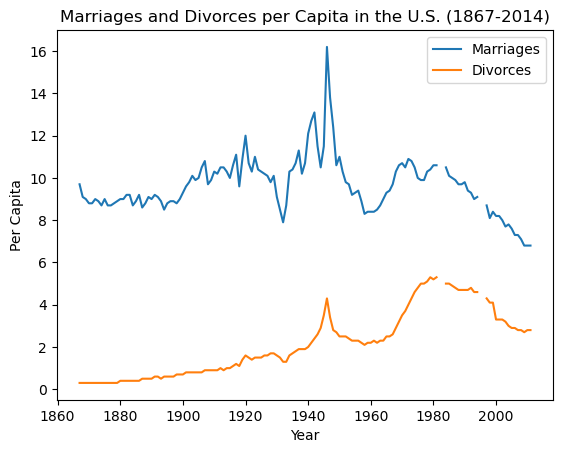

In [112]:
#A line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Strip any whitespace characters from the column names
data.columns = data.columns.str.strip()

# Create a line plot
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces')

# Set the labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Show the plot
plt.show()




# QUESTION 7

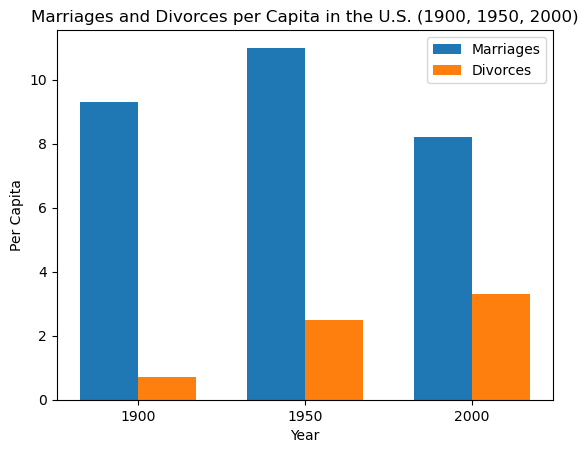

In [113]:
#a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data.columns = data.columns.str.strip()

# Filter data for the years 1900, 1950, and 2000
selected_years = data[(data['Year'] == 1900) | (data['Year'] == 1950) | (data['Year'] == 2000)]

# Set up the bar chart
years = selected_years['Year']
bar_width = 0.35  # Width of the bars
index = np.arange(len(years))

# Plot bars for marriages and divorces
plt.bar(index, selected_years['Marriages_per_1000'], bar_width, label='Marriages')
plt.bar(index + bar_width, selected_years['Divorces_per_1000'], bar_width, label='Divorces')

# Set labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(index + bar_width / 2, years)
plt.legend()

# Show the plot
plt.show()


# QUESTION 8

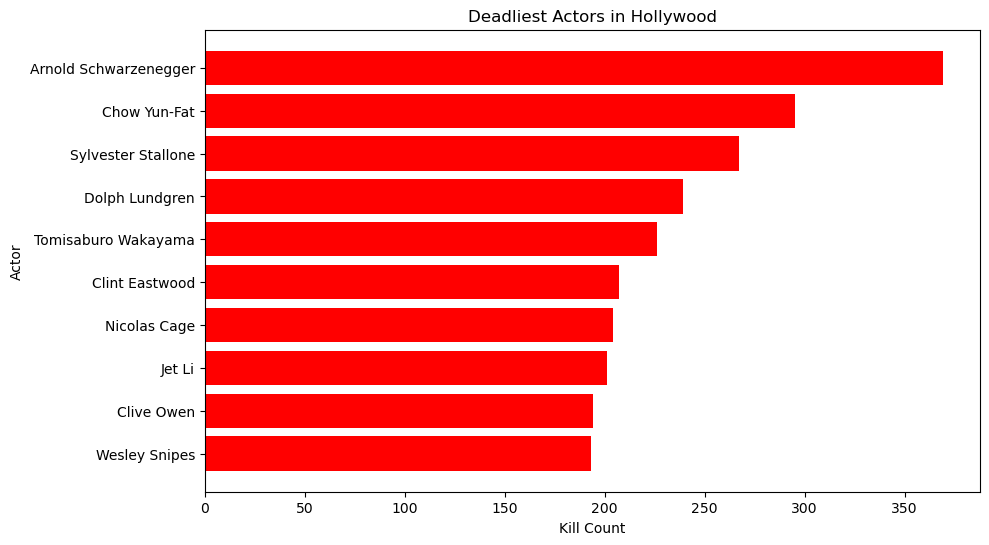

In [115]:
#a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

import pandas as pd
import matplotlib.pyplot as plt

# Loading the actor kill counts data from the CSV file
file_path_actor = 'actor_kill_counts.csv'  # Replace with your file path
actor_kill_data = pd.read_csv(file_path_actor)

# Sorting the data by the kill count in ascending order for better visualization
actor_kill_data = actor_kill_data.sort_values(by='Count', ascending=True)

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actor_kill_data['Actor'], actor_kill_data['Count'], color='red')

# Adding labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')


plt.show()




# QUESTION 9

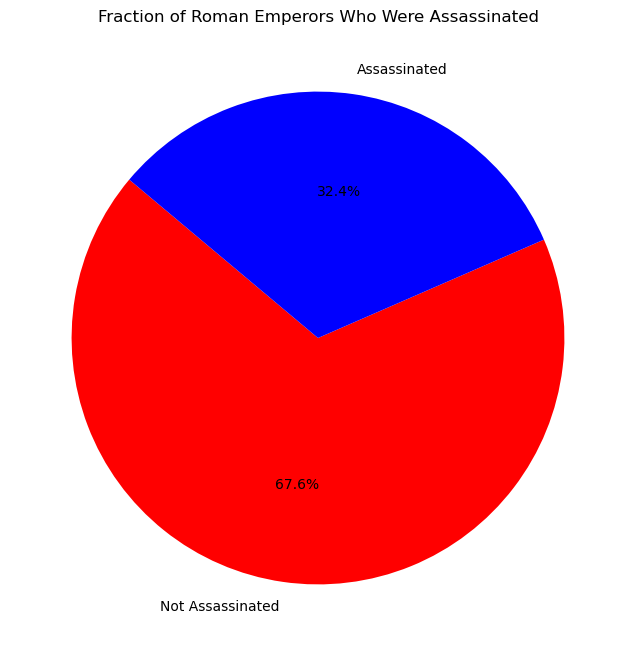

In [116]:
#A pie chart showing the fraction of all Roman Emperors that were assassinated.

import pandas as pd
import matplotlib.pyplot as plt

# Loading the Roman Emperor data from the CSV file
file_path_emperor = 'roman-emperor-reigns.csv'  # Replace with your file path
emperors_data = pd.read_csv(file_path_emperor)

# Classifying the causes of death into "Assassinated" and "Not Assassinated"
emperors_data['Assassinated'] = emperors_data['Cause_of_Death'].apply(
    lambda x: 'Assassinated' if 'Assassinated' in x else 'Not Assassinated'
)

# Counting the number of assassinated vs. not assassinated
assassination_counts = emperors_data['Assassinated'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    assassination_counts,
    labels=assassination_counts.index,
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=140,  # Start angle for better distribution
    colors=['red', 'blue']  # Custom colors for each section
)

# Adding title
plt.title('Fraction of Roman Emperors Who Were Assassinated')

plt.show()


# QUESTION 10

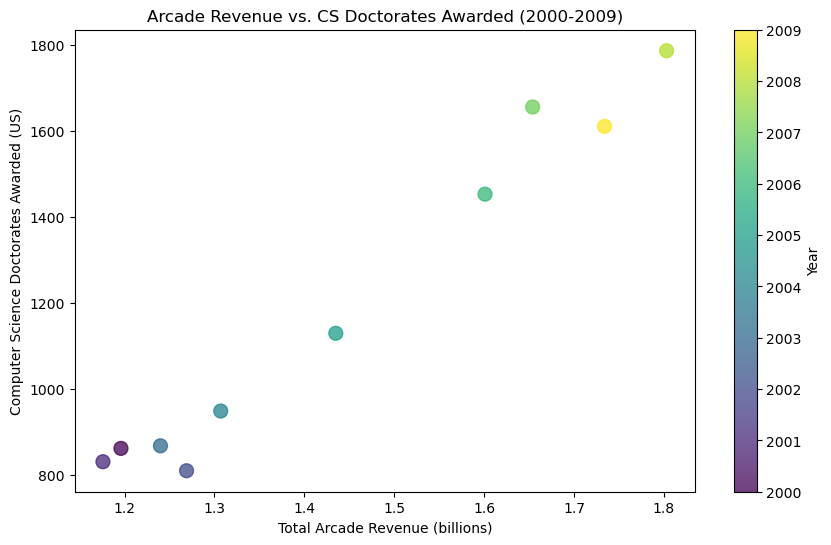

In [117]:
#A scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

import pandas as pd
import matplotlib.pyplot as plt

# Loading the arcade revenue vs CS doctorates data from the CSV file
file_path_arcade = 'arcade-revenue-vs-cs-doctorates.csv'  # Replace with your file path
arcade_data = pd.read_csv(file_path_arcade)

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    arcade_data['Total Arcade Revenue (billions)'],
    arcade_data['Computer Science Doctorates Awarded (US)'],
    c=arcade_data['Year'],  # Color by year
    cmap='viridis',  # Color map for the years
    s=100,  # Size of the points
    alpha=0.75  # Transparency of the points
)

# Adding color bar to show the year
plt.colorbar(label='Year')

# Adding labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. CS Doctorates Awarded (2000-2009)')


plt.show()
